In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [20]:
df=pd.read_csv('heights.csv')
df.head()

,mother height,daughter height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70


In [21]:
X_list=df['mother height'].tolist()
Y_list=df['daughter height'].tolist()

In [22]:
X_list=np.array(X_list)
Y_list=np.array(Y_list)

In [23]:
b0, b1, alpha = 0, 0, 0.01
n = len(X_list)
num_epochs = 4
X_reshaped = X_list.reshape(-1, 1)


scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_normalized = scaler_X.fit_transform(X_reshaped)
Y_normalized = scaler_Y.fit_transform(Y_list.reshape(-1, 1)).ravel()

for epoch in range(num_epochs):
    total_error = 0
    for i in range(n):
        mse_history=[]

        pred = b0 + b1 * X_normalized[i]

        error = pred - Y_normalized[i]

        b0 -= alpha * error 
        b1 -= alpha * error * X_normalized[i]
    mse = total_error / n
    mse_history.append(mse)

b0 = scaler_Y.mean_ - (b1 * scaler_X.mean_) * scaler_Y.scale_ / scaler_X.scale_
b1 = b1 * scaler_Y.scale_ / scaler_X.scale_

print("Intercept (b0):", b0)
print("Slope (b1):", b1)
    

Intercept (b0): [46.69579291]
Slope (b1): [0.26200851]


In [24]:
y_63=b0+b1*63
print(y_63)

[63.20232908]


In [26]:
from sklearn.linear_model import SGDRegressor

X_reshaped = X_list.reshape(-1, 1)
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_normalized = scaler_X.fit_transform(X_reshaped)
Y_normalized = scaler_Y.fit_transform(Y_list.reshape(-1, 1)).ravel()
regressor = SGDRegressor(max_iter=4,learning_rate='constant',eta0=0.01)
regressor.fit(X_normalized, Y_normalized)

/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=4)

Intercept (b0): 0.0013971337885254223
Slope (b1): 0.26200851059544306
MSE: 18.148741957182633
RMSE: 4.260134030424704
MAE: 3.9346506583913103


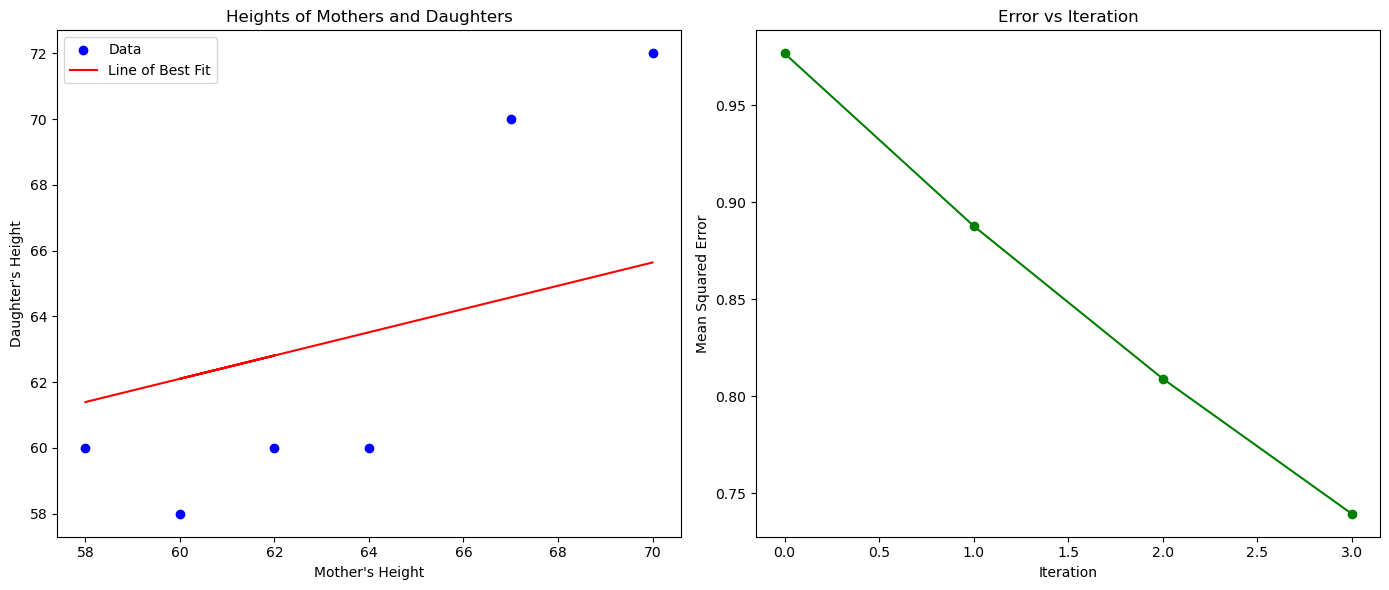

In [16]:

def normalize(X, Y):
    mean_X = X.mean()
    std_X = X.std()
    mean_Y = Y.mean()
    std_Y = Y.std()
    
    X_normalized = (X - mean_X) / std_X
    Y_normalized = (Y - mean_Y) / std_Y
    
    return X_normalized, Y_normalized, mean_X, std_X, mean_Y, std_Y


X_normalized, Y_normalized, mean_X, std_X, mean_Y, std_Y = normalize(X_list, Y_list)


b0, b1, alpha = 0, 0, 0.01
n = len(X_list)
num_epochs = 4
mse_history = []


for epoch in range(num_epochs):
    total_error = 0
    for i in range(n):
        pred = b0 + b1 * X_normalized[i]
        error = pred - Y_normalized[i]
        b0 -= alpha * error
        b1 -= alpha * error * X_normalized[i]
        total_error += error ** 2
    
    mse = total_error / n
    mse_history.append(mse)


b0 = b0 * std_Y / std_X
b1 = b1 * std_Y / std_X


predictions_normalized = b0 + b1 * X_normalized
predictions = predictions_normalized * std_Y + mean_Y


mse = np.mean((Y_list - predictions) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Y_list - predictions))

print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.scatter(X_list, Y_list, color='blue', label='Data')
plt.plot(X_list, predictions, color='red', label='Line of Best Fit')
plt.xlabel('Mother\'s Height')
plt.ylabel('Daughter\'s Height')
plt.title('Heights of Mothers and Daughters')
plt.legend()

# Plot error vs iteration
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), mse_history, marker='o', color='green')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Error vs Iteration')

plt.tight_layout()
plt.show()

In [27]:

b0 = regressor.intercept_[0]
b1 = regressor.coef_[0]

b0 = scaler_Y.mean_ - (b1 * scaler_X.mean_) * scaler_Y.scale_ / scaler_X.scale_
b1 = b1 * scaler_Y.scale_ / scaler_X.scale_

print("Intercept (b0):", b0)
print("Slope (b1):", b1)


Intercept (b0): [46.82996325]
Slope (b1): [0.25989559]


In [28]:
#q2


In [37]:
df2=pd.read_csv('hours_pass.csv')

In [38]:
X_list = np.array(df2['Hours of Study'])
Y_list = np.array(df2['Pass'])

In [57]:
alpha = 0.01
num_epochs = 500
n = len(X_list)
b0,b1=0,0
X_list_reshaped = X_list.reshape(-1, 1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_error(Y, predictions):
    return -np.mean(Y * np.log(predictions + 1e-15) + (1 - Y) * np.log(1 - predictions + 1e-15))
mse_history = []


Intercept (b0): -3.590247463361757
Slope (b1): 0.8974764921153755
Probability of passing for 3.5 hours: 0.3895795881477794
Probability of passing for 7.5 hours: 0.9585457239660987
Accuracy: 100.00%


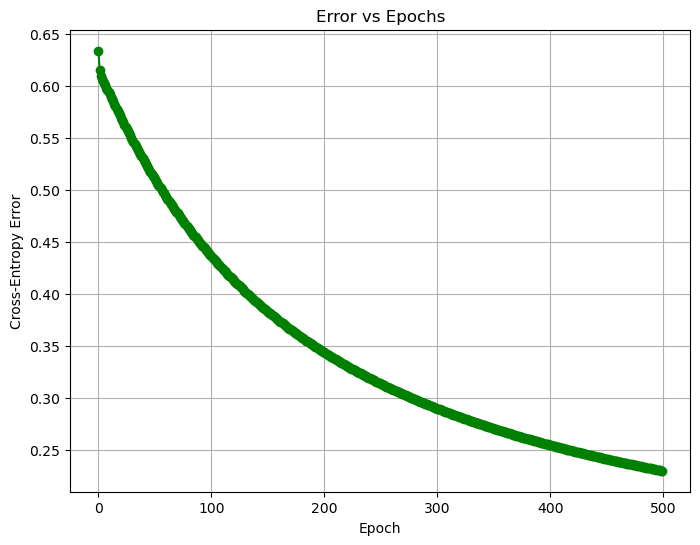

In [58]:
for epoch in range(num_epochs):
    total_error = 0
    for i in range(n):
        z = b0 + b1 * X_list[i]
        pred = sigmoid(z)
        

        error = pred - Y_list[i]

        b0 -= alpha * error
        b1 -= alpha * error * X_list[i]
        

        total_error += error ** 2

    predictions = sigmoid(b0 + b1 * X_list)
    epoch_error = compute_error(Y_list, predictions)
    mse_history.append(epoch_error)

predicted_classes = (predictions >= 0.5).astype(int)


accuracy = np.mean(predicted_classes == Y_list)


X_new = np.array([3.5, 7.5])
predictions_new = sigmoid(b0 + b1 * X_new)


print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")
print(f"Probability of passing for 3.5 hours: {predictions_new[0]}")
print(f"Probability of passing for 7.5 hours: {predictions_new[1]}")
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs), mse_history, marker='o', color='green')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Error')
plt.title('Error vs Epochs')
plt.grid(True)
plt.show()


In [56]:
#q3

In [54]:
X1=np.array([4,2,1,3,1,6])
X2=np.array([1,8,0,2,4,7])
Y_old=np.array([2,-14,1,-1,-7,-8])
Y=[]
for num in Y_old:
    if sigmoid(num)>=0.5:
        Y.append(1)
    else:
        Y.append(0)
Y=np.array(Y)
alpha = 0.01
num_epochs = 100
n = len(X1)
b0,b1,b2=0,0,0
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_error(Y, predictions):
    return -np.mean(Y * np.log(predictions + 1e-15) + (1 - Y) * np.log(1 - predictions + 1e-15))
mse_history = []


Intercept (b0): 0.2657770850022326
Slope (b1): 0.4791268631106278
Accuracy: 100.00%


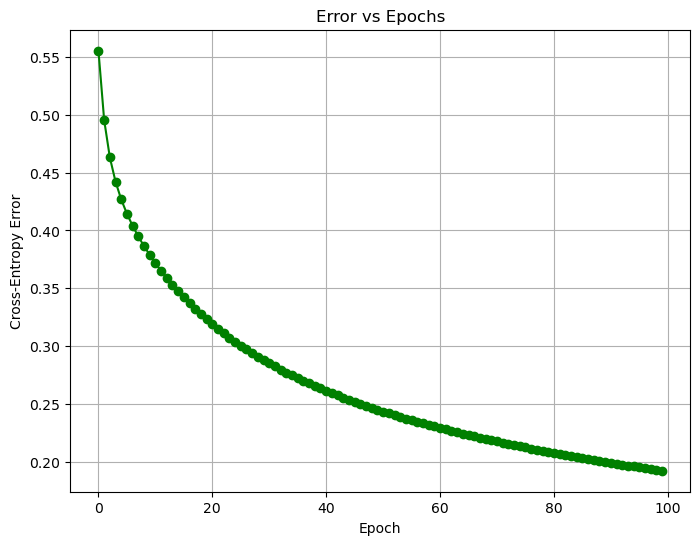

In [55]:
for epoch in range(num_epochs):
    total_error = 0
    for i in range(n):
        z = b0 + b1 * X1[i]+b2*X2[i]
        pred = sigmoid(z)
        

        error = pred - Y[i]

        b0 -= alpha * error
        b1 -= alpha * error * X1[i]
        b2 -= alpha * error * X2[i]
        

        total_error += error ** 2

    predictions = sigmoid(b0 + b1 * X1+b2*X2)
    epoch_error = compute_error(Y, predictions)
    mse_history.append(epoch_error)

predicted_classes = (predictions >= 0.5).astype(int)


accuracy = np.mean(predicted_classes == Y)





print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs), mse_history, marker='o', color='green')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Error')
plt.title('Error vs Epochs')
plt.grid(True)
plt.show()